In [158]:
import ctypes

class DynamicArray:
    """A dynamic array class akin to a simplified Python list."""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0      # count actual elements
        self._capacity = 1  # default array capacity
        self._A = self._make_array(self._capacity) # low-level array
         
    def __len__(self):
        """Return number of elements stored in the array."""
        return self._n
    
    def __getitem__(self, k):
        """Return element at index k."""
        if not 0<=k<self._n:
            raise IndexError( 'invalid index' )
        return self._A[k]
    
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:
            self._resize(2  * self._capacity)
        self._A[self._n] = obj
        self._n += 1
    
    def  _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
        
    def insert(self, k, value):
        """Insert value at index k, shifting subsequent values rightward.""" # (for simplicity, we assume 0 <= k <= n in this verion)
        if self._n == self._capacity:
            self._resize(2 *  self._capacity)
            for j in range(self._n, k, -1):
                self._A[j] = self._A[j-1]
                self._A[k] = value
                self._n += 1
                
    def remove(self, value):
        """Remove first occurrence of value (or raise ValueError)."""
         # note: we do not consider shrinking the dynamic array in this version
        for k in range(self._n):
            if self._A[k] == value:     # found a match!
                for j in range(k, self._n - 1):  # shift others to fill gap
                    self._A[j] = self._A[j+1]
                self._A[self._n - 1] = None # help garbage collection 
                self._n -= 1  # we have one less item
                return                   # exit immediately
        raise ValueError( 'value not found' ) # only reached if no match
   
    
    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c *  ctypes.py_object)( )
    
da = DynamicArray()    
da.insert(0,1)
da.append(2)
da.append(4)
da.__getitem__(1)
#print(da)

4

In [25]:
class GameEntry:
    """Represents one entry of a list of high scores."""
    def  __init__ (self, name, score):
        self._name = name
        self._score = score
    
    def get_name(self):
        return self._name
    
    def get_score(self):
        return self._score
    
    def __str__ (self):
        return '({0}, {1})' .format(self._name, self._score)
    
print('Aruna', 87)    

Aruna 87


In [80]:
class Scoreboard:
    """Fixed-length sequence of high scores in nondecreasing order."""
    def   __init__(self, capacity=3):
        """Initialize scoreboard with given maximum capacity.
        All entries are initially None.
        """
        self._board = [None] * capacity  # reserve space for future scores
        self._n = 0  # number of actual entries
    def  __getitem__(self, k): 
        """Return entry at index k.""" 
        return self._board[k]
 
    def __str__ (self):
        """Return string representation of the high score list."""
        return '\n'.join(str(self._board[j]) for j in range(self._n))

    def add(self, entry:GameEntry):

        """Consider adding entry to high scores.""" 
        score = entry.get_score()

        # Does new entry qualify as a high score?
        # answer is yes if board not full or score is higher than last entry

        good = self._n < len(self._board) or score > self._board[-1].get_score()
        if good:
            if self._n < len(self._board): # no score drops from list
                self._n += 1               # so overall number increases
        # shift lower scores rightward to make room for new entry
            j=self._n-1
            while j > 0 and self._board[j-1].get_score() < score:
                self._board[j] = self._board[j-1]
                j -= 1
            self._board[j] = entry

#score = [('paul',89),('pa',98),('ul',59)] 
# for name,score in score:
#     print(g(name,score))

s= Scoreboard()
s.add(GameEntry('paul',89))
s.add(GameEntry('pa',76))
s.add(GameEntry('pau',95))
s.add(GameEntry('ar',75))
s.add(GameEntry('ar',78))
print(s)

(pau, 95)
(paul, 89)
(ar, 78)


In [58]:
def insertion_sort(A):
    """Sort list of comparable elements into nondecreasing order."""
    for k in range(1, len(A)):  # from 1 to n-1
        cur = A[k]    # current element to be inserted
        j=k              # find correct index j for current
        while j > 0 and A[j-1] > cur: # element A[j-1] must be after current
            A[j] = A[j-1]
            j -= 1
            A[j] = cur  # cur is now in the right place

    return A


A=[3,5,6,2,4,1]
print(insertion_sort(A))


[1, 2, 3, 4, 5, 6]


In [81]:
class CaesarCipher:
    """Class for doing encryption and decryption using a Caesar cipher."""
    def  __init__(self, shift):
        """Construct Caesar cipher using given integer shift for rotation."""
        encoder = [None] *  26 # temp array for encryption
        decoder = [None] *  26 # temp array for decryption 
        for k in range(26):
            encoder[k] = chr((k + shift) % 26 + ord( 'A' ))
            decoder[k] = chr((k - shift) % 26 + ord( 'A' ))
        self._forward = ''.join(encoder) # will store as string 
        self._backward =  ''.join(decoder) # since fixed

    def encrypt(self, message):
        """Return string representing encripted message."""
        return self._transform(message, self._forward)

    def decrypt(self, secret):
        """Return decrypted message given encrypted secret."""
        return self._transform(secret, self._backward)

    def  _transform(self, original, code):
        """Utility to perform transformation based on given code string."""
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper():
                j=ord(msg[k])-ord( 'A' )  #indexfrom0to25
                msg[k] = code[j]   # replace this character
        return ''.join(msg)


cipher = CaesarCipher(3)
message = "THE EAGLE IS IN PLAY; MEET AT JOE S."
coded = cipher.encrypt(message)
print( 'Secret: ' , coded)
answer = cipher.decrypt(coded)
print( 'Message: ', answer)

Secret:  WKH HDJOH LV LQ SODB; PHHW DW MRH V.
Message:  THE EAGLE IS IN PLAY; MEET AT JOE S.


In [117]:
class TicTacToe:
    """Management of a Tic-Tac-Toe game (does not do strategy)."""
    def __init__ (self):
        """Start a new game."""
        self._board=[[' '] * 3 for j in range(3)]
        self._player = 'X'
    
    def mark(self, i, j):
        """Put an X or O mark at position (i,j) for next player s turn."""
        if not (0 <= i <= 2 and 0 <= j <= 2):
            raise ValueError( 'Invalid board position' )
        if self._board[i][j] != ' ':
            raise ValueError( 'Board position occupied' )
        if self.winner() is not None:
            raise ValueError( 'Game is already complete' )
        self._board[i][j] = self._player
        if self._player == 'X' :
            self._player = 'O' 
        else:
            self._player = 'X'
            
    def _is_win(self, mark):
        """Check whether the board configuration is a win for the given player."""
        board = self._board # local variable for shorthand
        return (mark == board[0][0] == board[0][1] == board[0][2] or
                          mark == board[1][0] == board[1][1] == board[1][2] or
                          mark == board[2][0] == board[2][1] == board[2][2] or
                          mark == board[0][0] == board[1][0] == board[2][0] or
                          mark == board[0][1] == board[1][1] == board[2][1] or
                          mark == board[0][2] == board[1][2] == board[2][2] or
                          mark == board[0][0] == board[1][1] == board[2][2] or
                          mark == board[0][2] == board[1][1] == board[2][0])   

    def winner(self):
        """Return mark of winning player, or None to indicate a tie."""
        for mark in  'XO':
            if self._is_win(mark):
                return mark
        return None


    def __str__ (self):
        """Return string representation of current game board."""
        rows = ['|'.join(self._board[r]) for r in range(3)]
        return '\n-----\n'.join(rows)

In [118]:
game = TicTacToe()
# X moves:         # O moves:          
game.mark(1, 1); game.mark(0, 2)
game.mark(2, 2); game.mark(0, 0)
game.mark(0, 1); game.mark(2, 1)
game.mark(1, 2); game.mark(1, 0)
game.mark(2, 0)


print(game)
winner = game.winner()
if winner is None:
    print( 'Tie' ) 
else:
    print(winner, 'wins' )

O|X|O
-----
O|X|X
-----
X|O|X
Tie


In [10]:
#---------R- 5.1------------

import sys
data = []
for k in range(10):
    a = len(data)
    b = sys.getsizeof(data)
    print('Length: {0:3d}; size of bytes: {1:4d}'.format(a,b))
    data.append(None)
    
print(data)    

Length:   0; size of bytes:   72
Length:   1; size of bytes:  104
Length:   2; size of bytes:  104
Length:   3; size of bytes:  104
Length:   4; size of bytes:  104
Length:   5; size of bytes:  136
Length:   6; size of bytes:  136
Length:   7; size of bytes:  136
Length:   8; size of bytes:  136
Length:   9; size of bytes:  200
[None, None, None, None, None, None, None, None, None, None]


In [124]:
#---------R- 5.1------------

import sys
def array_jump(n):
    data = []
    size_old = 0
    for k in range(10000):
        size = sys.getsizeof(data)
        if size != size_old:
            print(len(data), end= ',')
        size_old = size
        data.append(None)
    
array_jump(1000)

0,1,5,9,17,26,36,47,59,73,89,107,127,149,174,202,234,270,310,355,406,463,527,599,680,772,875,991,1121,1268,1433,1619,1828,2063,2327,2624,2959,3335,3758,4234,4770,5373,6051,6814,7672,8638,9724,

In [129]:
#---------R- 5.3------------

import sys


def array_grow_shrink(n, lower_limit = 0.4):
    data = []
    size_old = 0
    current_limit = 10
    for i in range(n):
        if i == current_limit:
            while len(data)> current_limit*lower_limit:
                data.pop()
                size = sys.getsizeof(data)
                print(len(data), size, end = '\t\t')
                if size<size_old:
                    print ('Size decreased from:', size_old, size)
                else: print("")
                size_old = size
            current_limit *= 10
        data.append(None)
        
        
array_grow_shrink(100)

9 200		
8 200		
7 152		Size decreased from: 200 152
6 152		
5 152		
4 128		Size decreased from: 152 128


In [207]:
#---------R- 5.4------------

class DynamicArray2(DynamicArray):
    def __getitem__(self, k):
        """Return element at index k."""
        if k < 0:
            j = abs(k)
            if not 0<=j<=self._n:
                raise IndexError( 'invalid index' )
            else:
                return self._A[self._n-j]
        return self._A[k]
    
da = DynamicArray2()    
da.insert(0,1)
da.append(2)
da.append(4)
da.append(6)

da[-3] 


2

In [196]:
#-------------R5-5----------------------
"""
If the cost of growing an array from size k to size 2K is 3k cyber dollars, we  know that we need 
to accumulate at least 3K cyber dollars during the preceding appends

For an array of length k, half are filled in so we only actually have k/2 insertions from which to 
get a surplus of 3K.  That means we need (k/2)*(dollars per operation) = 3K or
dollars per operation = 6.  That means that we need to overcharge by exactly 6 cyber-dollars for each
operation

Note that since 6 is a constant, is still means that we have amortized the cost to be O(1) for an insertion

If our value was 6k or something like that, it would grow linearly with n, giving us O(n) overall


"""

'\nIf the cost of growing an array from size k to size 2K is 3k cyber dollars, we  know that we need \nto accumulate at least 3K cyber dollars during the preceding appends\n\nFor an array of length k, half are filled in so we only actually have k/2 insertions from which to \nget a surplus of 3K.  That means we need (k/2)*(dollars per operation) = 3K or\ndollars per operation = 6.  That means that we need to overcharge by exactly 6 cyber-dollars for each\noperation\n\nNote that since 6 is a constant, is still means that we have amortized the cost to be O(1) for an insertion\n\nIf our value was 6k or something like that, it would grow linearly with n, giving us O(n) overall\n\n\n'

In [222]:
#---------R- 5.6------------

class DynamicArray3(DynamicArray):
    def _insert_resize(self, c, k):
        #Don't add anything here, just leave a space for the future insertion
        B = self._make_array(c)
        for i in range(self._n):
            if i<k: B[i] = self._A[i]
            else: B[i+1] = self._A[i]
        self._A = B
        self._capacity = c
        
    def insert2(self, k, value):
        if self._n == self._capacity:
            self._insert_resize(2 *  self._capacity,k)
        else:
            for j in range(self._n, k, -1):
                self._A[j] = self._A[j-1]
        self._A[k] = value
        self._n += 1
                           
                
                
da = DynamicArray3()    

da.append(2)  
da.append(3) 
da.append(5)
da.insert2(2,1)
print(da._n)
da[2]

4


1

In [ ]:
#---------R- 5.7------------
def repeated(A):
    B = sorted(A)
    for i in range(len(B)-1):
        if B[i] == B[i+1]:
            return B[i]
    return False


repeated([2,3,4,1,2])  
#repeated([2,3,4,1]) 

No handles with labels found to put in legend.


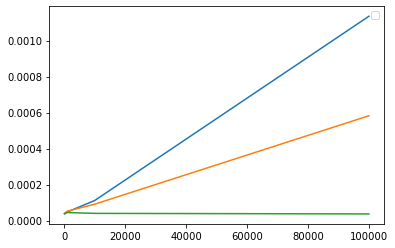

       100       1000      10000     100000
0.0  0.000039  0.000048  0.000112  0.001135
0.5  0.000040  0.000052  0.000091  0.000582
1.0  0.000038  0.000045  0.000040  0.000037


In [1]:
#---------------R5-8----------------------
import time
import pandas as pd
import matplotlib.pyplot as plt

def time_pops(test_array):
    results = pd.DataFrame()
    
    for test_len in test_array:
        
        for position in [0, 0.5, 1]:
            start = time.time()
            for _ in range (100): #Lower this to speed up the program, although the numbers may be too small to see
                data = [None]*test_len
                while len(data)>1: #stop a bit early to avoid a negative index
                    data.pop(int((len(data)-1)*position))
            end = time.time()
            
            results.loc[position, test_len] = (end-start)/test_len
    return results
    
    
    

    
test_array = [10**i for i in range(2, 6)]
results = time_pops(test_array)

for i in range(len(results)):
    plt.plot(results.iloc[i])

plt.legend()
plt.show()


print(results)


In [2]:
#----------------R5-9-----------------------
"""
For the Caesar cipher to be used in a language like Russian

Cyrillic: АБВГҐДЂЃЕЀЁЄЖЗЗ́ЅИЍІЇЙЈКЛЉМНЊОПРСС́ТЋЌУЎФХЦЧЏШЩЪЫЬЭЮЯ

Greek:  ΑαΒβΓγΔδΕεΖζΗηΘθΙιΚκΛλΜμΝνΞξΟοΠπΡρΣσςΤτΥυΦφΧχΨψΩω

The easiest way for these languages is just to change every instance of 26 to the length of the language and then add
ord([first letter]) to the alphabet.  Both cyrillic and greek seem to have the majority of their characters in a contiguous
block of characters, but if the few extra characters in cyrillic were important.

A more generalized solution (below) might be better to use a dictionary 
to look up the values rather than use math and ord/chr to figure it out.

Note that other languages use accents, which makes it much more complicated.  We have just
stuck to the base characters here
"""


cyrillic = list(map(ord, 'АБВГҐДЂЃЕЀЁЄЖЗЗ́ЅИЍІЇЙЈКЛЉМНЊОПРСС́ТЋЌУЎФХЦЧЏШЩЪЫЬЭЮЯ'))
greek = list(map(ord, 'ΑαΒβΓγΔδΕεΖζΗηΘθΙιΚκΛλΜμΝνΞξΟοΠπΡρΣσςΤτΥυΦφΧχΨψΩω'))
print('Cyrillic: ', sorted(cyrillic), end='\n\n')
print('Greek:', sorted(greek), end='\n\n')

class CaesarCipherDic():
      
    def __init__(self, shift, language = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
        ll = sorted(list(language)) #ll = language_list
        lang_len = len(ll)
        self._encoder = {}
        self._decoder = {}
        for i in range(lang_len):
            self._encoder[ll[i]] = ll[(i+shift)%lang_len]
            self._decoder[ll[i]] = ll[(i-shift)%lang_len]
        
        
    def encrypt(self, message):
        return self._transform(message, self._encoder)
    
    def decrypt(self, message):
        return self._transform(message, self._decoder)
    
    def _transform(self, original, code):
        msg = list(original)
        for k in range(len(msg)):
            if msg[k] in code:  #This is an O(1) check because code is a dictionary
                msg[k] = code[msg[k]]
        return ''.join(msg)
    
print('English Cipher')
cipher = CaesarCipherDic(3)
message = "THE EAGLE IS IN PLAY; MEET AT JOE'S"
coded = cipher.encrypt(message)
print('Secret: ', coded)
answer = cipher.decrypt(coded)
print('Answer: ', answer)

print('\n\nGreek Cipher')
cipher_greek = CaesarCipherDic(7, language = 'ΑαΒβΓγΔδΕεΖζΗηΘθΙιΚκΛλΜμΝνΞξΟοΠπΡρΣσςΤτΥυΦφΧχΨψΩω')
message = "μηδείς αγεωµετρητος εισιτω µον την στεγην"
coded = cipher_greek.encrypt(message)
print('Secret: ', coded)
answer = cipher_greek.decrypt(coded)
print('Answer: ', answer)

Cyrillic:  [769, 769, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1168]

Greek: [913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 931, 932, 933, 934, 935, 936, 937, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969]

English Cipher
Secret:  WKH HDJOH LV LQ SODB; PHHW DW MRH'V
Answer:  THE EAGLE IS IN PLAY; MEET AT JOE'S


Greek Cipher
Secret:  σξλμίω θκμΗµμΒψξΒφω μπΑπΒΗ µφτ Βξτ ΑΒμκξτ
Answer:  μηδείς αγεωµετρητος εισιτω µον την στεγην


In [3]:
#-------------R5-10----------------------
class CaesarCipher():
      
    def __init__(self, shift):
        self._forward = ''.join(chr((k+shift)%26 + ord('A')) for k in range(26)) 
        self._backward = ''.join(chr((k-shift)%26 + ord('A')) for k in range(26)) 
        
        
    def encrypt(self, message):
        return self._transform(message, self._forward)
    
    def decrypt(self, message):
        return self._transform(message, self._backward)
    
    def _transform(self, original, code):
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper():
                j = ord(msg[k]) - ord('A')
                msg[k] = code[j]
        return ''.join(msg)
    

cipher = CaesarCipher(3)
message = "THE EAGLE IS IN PLAY; MEET AT JOE'S"
coded = cipher.encrypt(message)
print('Secret: ', coded)
answer = cipher.decrypt(coded)
print('Answer: ', answer)

Secret:  WKH HDJOH LV LQ SODB; PHHW DW MRH'V
Answer:  THE EAGLE IS IN PLAY; MEET AT JOE'S


In [16]:
#-------------R5-11----------------------
def addition_nxn(data):
    sum = 0
    for i in range(len(data)):
        for j in range(len(data)):
            sum += data[i][j]
    return sum

c=2
r=2
data = [[0]*c for j in range(r)]
data[0][1]=1
data[1][1]=2
print(addition_nxn(data))

#Create a list from 1 to 100, which should have the sum (101)(100)/2 = 5050
list_of_lists = [list(range(i, i+10)) for i in range(1,100, 10)] 
#[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
#print(addition_nxn(list_of_lists))
print(addition_nxn(list_of_lists))

3
5050


In [24]:
#-------------R5-12----------------------
def addition_nxn2(data):
    return (sum(data[i][j]) for i in range(len(data)) for j in range(len(data)))

def sum_2d_w_sum(array):
    return sum([sum(i) for i in array])

c=2
r=2
data = [[0]*c for j in range(r)]
data[0][1]=1
data[1][1]=2
print(sum_2d_w_sum(data))

3
